# ***Project:   COVID-19 Detection by using Chest X-RAY, with focus on Explainability***
# **Course: Deep Learning**

**Submitted By: Sohail**

**Roll No: FA19-MSCS-0059**

**Submitted to: Dr. Asim Wagan**

**Dated: 10-Jun-2020**




---



# ***Section 1 :  Data Transformation, Modeling, Training and Evaluation***



---



***Importing Liberaries***

In [0]:
#pip install lime #Uncomment this statement to install Lime

In [0]:
#Importing the required Liberaries
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import backend as K
from keras.models import load_model
from keras.utils import normalize, to_categorical
from keras.preprocessing.image import ImageDataGenerator
import csv
import cv2
from keras.preprocessing import image
#Importing the required Liberaries for Lime Framework used for Explainability
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

***Mounting Google Drive***

In [21]:
#Mounting Google drive to fetch Dataset
from google.colab import  drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Using ImageDataGenerator to fetch Data wtih corresponding Classes**

flow_from_directory  method will identify classes automatically from the folder name

In [22]:
# creating a data generator to fetch dataset from Drive directory
datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
#def make_generator():
#    train_datagen = ImageDataGenerator(rescale=1. / 255)
#    train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/covid19-detection-xray-dataset/TrainData' ,target_size=(224, 224), class_mode='categorical', batch_size=32)
#    return train_generator

#train_dataset = tf.data.Dataset.from_generator(make_generator,(tf.float32, tf.float32))


# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/My Drive/covid19-detection-xray-dataset/TrainData', class_mode='categorical',
                                       target_size=(224,224),  batch_size=581 )

test_it = datagen.flow_from_directory('/content/drive/My Drive/covid19-detection-xray-dataset/ValData', 
                                      batch_size=214, target_size=(224, 224),  class_mode='categorical')


Found 581 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


***Defining Classes/Labels***

In [0]:
class_names = ['COVID-19', 'Normal']

***Breaking  Data Iterators into X,Y Training and testing sets***

In [0]:
x_train, y_train=train_it.next()
x_test, y_test=test_it.next()

***Exploring The Dataset shape and Dimension***

In [25]:
print("=========== Exploring The Dataset ======================",
"\nShape of Training set X: ", x_train.shape,
"\n Shape of Training set Y: ",y_train.shape,
"\n Shape of Test set X: ",x_test.shape,
"\n Shape of Test set Y: ",y_test.shape,
)


=========== Exploring The Dataset ====================== 
Shape of Training set X:  (581, 224, 224, 3) 
 Shape of Training set Y:  (581, 2) 
 Shape of Test set X:  (214, 224, 224, 3) 
 Shape of Test set Y:  (214, 2)


***Visualizing The Dataset Before Training***

=========== Visualizing The Dataset ======================


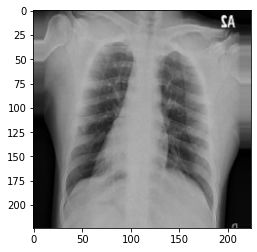

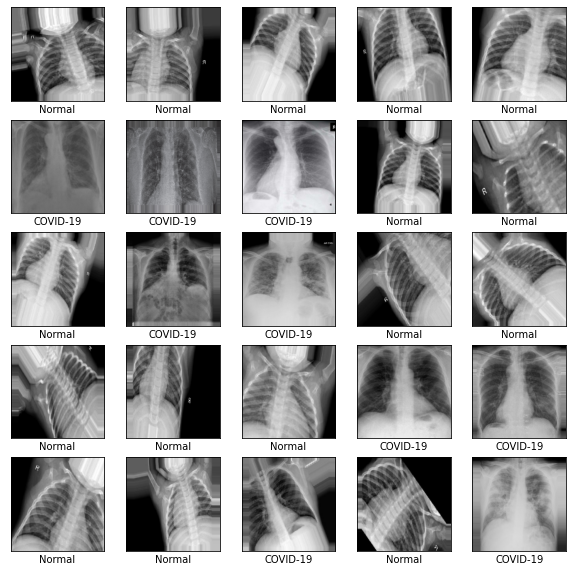

In [26]:
print("=========== Visualizing The Dataset ======================");
imgplot = plt.imshow(x_test[0])
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    if(y_train[i][0]==0.0):
     classname="Normal"
    else:
     classname="COVID-19"
    plt.xlabel(classname)
    plt.xlabel(classname)
plt.show()

***Setting Important Paramaters to pass into Model***

In [0]:
batch_size = 128
num_classes = 2
epochs = 16
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)

***Dataset Transformation on the basis of data format, channels_first or channels_last***

In [28]:
#Checking whether Image data format is Channel Fist of Channel Last and Reshapping Accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (581, 224, 224, 3)
581 train samples
214 test samples


***Defining and Compiling Model***

In [29]:
model = keras.models.Sequential()

def plain_cnn_model():
 #Defining Model 

 #Adding Layers to Model
 model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))


#Compiling the model
 model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


 return model

plain_cnn_model()

***Model Fitting and Evaluation on Test set***

In [30]:
 
 #Fitting The Model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
        
          validation_data=(x_test, y_test))
 

 
 #Eveluating the Accuracy and loss of Model
score = model.evaluate(x_test, y_test, verbose=0)
global loss_plain
global acc_plain
loss_plain=score[0]*100
acc_plain=score[1]*100
print('Test loss:', loss_plain)
print('Test accuracy:', acc_plain)
model.save('CovidModel.h5')

Train on 581 samples, validate on 214 samples
Epoch 1/16
581/581 [==============================] - 51s 88ms/step - loss: 19.7591 - accuracy: 0.4647 - val_loss: 0.7849 - val_accuracy: 0.5093
Epoch 2/16
581/581 [==============================] - 49s 84ms/step - loss: 0.6371 - accuracy: 0.6162 - val_loss: 0.6598 - val_accuracy: 0.5280
Epoch 3/16
581/581 [==============================] - 49s 85ms/step - loss: 0.6010 - accuracy: 0.6713 - val_loss: 0.5319 - val_accuracy: 0.8131
Epoch 4/16
581/581 [==============================] - 49s 85ms/step - loss: 0.5536 - accuracy: 0.7470 - val_loss: 0.4922 - val_accuracy: 0.8224
Epoch 5/16
581/581 [==============================] - 50s 85ms/step - loss: 0.5381 - accuracy: 0.7229 - val_loss: 0.4859 - val_accuracy: 0.7617
Epoch 6/16
581/581 [==============================] - 49s 85ms/step - loss: 0.4623 - accuracy: 0.7969 - val_loss: 0.4254 - val_accuracy: 0.8411
Epoch 7/16
581/581 [==============================] - 49s 85ms/step - loss: 0.3999 - accu



---



# ***Section 2:  Results Explainability and Visualization***

***Visualizing the Ouput (Accuracy and loss) of Model***

Loss:  44.552418840265716 % 
Accuracy:  81.30841255187988 %


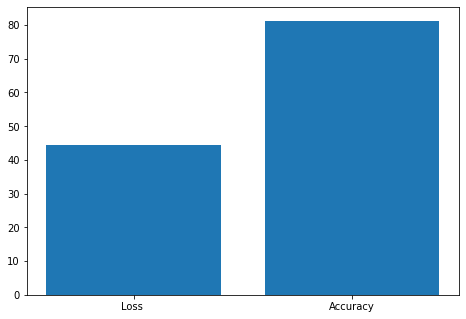

In [31]:
print('Loss: ',loss_plain,"%", '\nAccuracy: ',acc_plain,"%")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
evaluation = ['Loss ','Accuracy' ]
values = [loss_plain,acc_plain]
ax.bar(evaluation,values)
plt.show()

***Visualizing the results, (Actuall class vs predicted class over 100 patients)***

In [32]:
model = load_model('CovidModel.h5')
for i in range(100):
 if(y_test[i][0]==0.0):
   classname="Normal"
 else:
   classname="COVID-19"
 prediction=model.predict(x_test[[i]])
 
 label="Actual Class: ",classname
 if prediction[0][0] > prediction[0][1]:
   result="COVID-19"
 else:
   result="Normal"
 if result==classname:
   print("\033[0;32;47m")
   pred="True ✓ "
 else:
   print("\033[0;31;47m")
   pred="False ✘"  
 print("\nS.NO: ",i,"\tActual Class: ",classname, " Prediction:" ,result,"\t\t Result:",pred)



S.NO:  0 	Actual Class:  COVID-19  Prediction: COVID-19 		 Result: True ✓ 


S.NO:  1 	Actual Class:  COVID-19  Prediction: Normal 		 Result: False ✘


S.NO:  2 	Actual Class:  COVID-19  Prediction: COVID-19 		 Result: True ✓ 


S.NO:  3 	Actual Class:  Normal  Prediction: Normal 		 Result: True ✓ 


S.NO:  4 	Actual Class:  COVID-19  Prediction: COVID-19 		 Result: True ✓ 


S.NO:  5 	Actual Class:  COVID-19  Prediction: COVID-19 		 Result: True ✓ 


S.NO:  6 	Actual Class:  Normal  Prediction: COVID-19 		 Result: False ✘


S.NO:  7 	Actual Class:  Normal  Prediction: Normal 		 Result: True ✓ 


S.NO:  8 	Actual Class:  Normal  Prediction: Normal 		 Result: True ✓ 


S.NO:  9 	Actual Class:  COVID-19  Prediction: COVID-19 		 Result: True ✓ 


S.NO:  10 	Actual Class:  COVID-19  Prediction: COVID-19 		 Result: True ✓ 


S.NO:  11 	Actual Class:  Normal  Prediction: COVID-19 		 Result: False ✘


S.NO:  12 	Actual Class:  COVID-19  Prediction: COVID-19 		 Result: True ✓ 


S.NO:  13 	A

***LIME - (Local Interpretable Model-Agnostic Explanations)*** 

Through LIME we attempt to understand the model by perturbing the input of data samples of X-Ray Images and try to exlain, what areas are the crucial points over an X-Ray which are helping the model to classify them as COVID-19 or Normal

***Defining Prediction Funcion to pass into Lime's Explainer Instance***

It will  covert the predicted result into probabiities

In [33]:
def predict_fn(images):
  logits = model.predict(images)
  probs = tf.nn.softmax(logits)
  return probs

predict_fn(x_test[[0]])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.54115164, 0.45884833]], dtype=float32)>

***Visualizing 25 samples of Chest X-Rays as explained by Lime Framework***

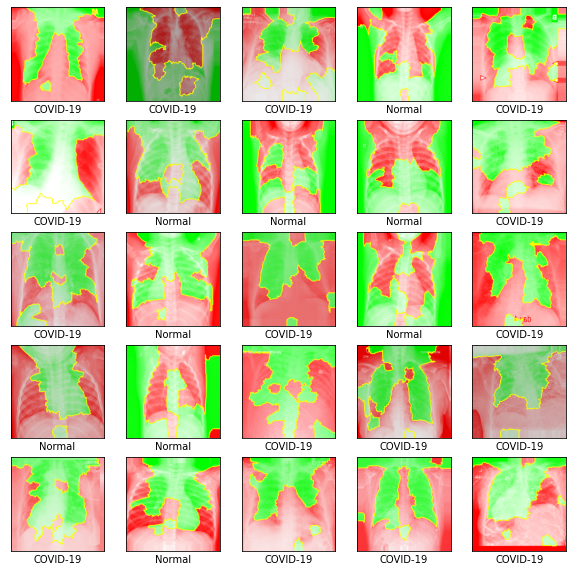

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if(y_test[i][0]==0.0):
     classname="Normal"
    #continue
    else:
     classname="COVID-19"
    plt.xlabel(classname)
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
    image=x_test[i], 
    classifier_fn=predict_fn, 
    top_labels=2, 
    hide_color=1, 
    #num_features=2, 
    num_samples=100)

    masked_image, boundaries = explanation.get_image_and_mask(
    #label=336,
    explanation.top_labels[0], 
    positive_only=False, 
    num_features=224, 
    hide_rest=True)

    plt.imshow(mark_boundaries(masked_image, boundaries))
